In [3]:
import pandas as pd
import os

base_dir = "/projects/b1198/epifluidlab/ravi/0425/headneck/Downsampled_Data/BH01"

files = {
    "56x": "BH01.hg38.frag.interval_mds.tsv",
    "50x": "BH01.hg38.frag.50x.interval_mds.tsv",
    "25x": "BH01.hg38.frag.25x.interval_mds.tsv",
    "10x": "BH01.hg38.frag.10x.interval_mds.tsv",
    "1x": "BH01.hg38.frag.1x.interval_mds.tsv",
    "0.1x": "BH01.hg38.frag.0.1x.interval_mds.tsv",
}

dfs = []

for label, fname in files.items():
    path = os.path.join(base_dir, fname)
    
    df = pd.read_csv(path, sep="\t", header=None)
    df.columns = ["chr", "start", "end", "dot", "rMDS"]
    
    df["interval"] = df["chr"] + ":" + df["start"].astype(str) + "-" + df["end"].astype(str)
    
    df = df[["interval", "rMDS"]]
    df["coverage"] = label
    
    dfs.append(df)

combined = pd.concat(dfs)

final_df = combined.pivot(index="coverage", columns="interval", values="rMDS")

In [4]:
final_df

interval,chr10:1000000-1500000,chr10:10000000-10500000,chr10:100000000-100500000,chr10:100500000-101000000,chr10:101000000-101500000,chr10:101500000-102000000,chr10:102000000-102500000,chr10:102500000-103000000,chr10:103000000-103500000,chr10:103500000-104000000,...,chrX:95000000-95500000,chrX:95500000-96000000,chrX:96000000-96500000,chrX:96500000-97000000,chrX:97000000-97500000,chrX:97500000-98000000,chrX:98000000-98500000,chrX:98500000-99000000,chrX:99000000-99500000,chrX:99500000-100000000
coverage,,,,,,,,,,,,,,,,,,,,,
0.1x,0.812156,0.832831,0.793534,0.822786,0.781111,0.806816,0.816309,0.813851,0.808875,0.811313,...,0.763661,0.687111,0.732508,0.746237,0.723481,0.727924,0.742099,0.771704,0.724599,0.718720
10x,0.949177,0.946951,0.945066,0.941554,0.943444,0.944506,0.942257,0.944774,0.945892,0.939217,...,0.937542,0.941067,0.939621,0.944308,0.945605,0.947146,0.940610,0.939290,0.941281,0.939501
1x,0.940335,0.934606,0.926772,0.928265,0.927655,0.932901,0.928200,0.928379,0.930601,0.923525,...,0.919240,0.912293,0.918774,0.916764,0.919961,0.918284,0.910199,0.913483,0.914475,0.917447
25x,0.949643,0.946862,0.944733,0.942624,0.944909,0.944541,0.943301,0.944647,0.947004,0.939163,...,0.939558,0.941618,0.940963,0.944742,0.946765,0.947536,0.942164,0.942267,0.941488,0.941926
50x,0.949129,0.946901,0.945517,0.942915,0.945380,0.945189,0.943350,0.944654,0.947711,0.939494,...,0.940751,0.941243,0.942230,0.946150,0.947850,0.947037,0.942504,0.942661,0.942008,0.942423
56x,0.949248,0.947082,0.945575,0.942863,0.945329,0.945209,0.943371,0.944745,0.947787,0.939774,...,0.940915,0.941478,0.942338,0.946456,0.948303,0.947144,0.942749,0.942683,0.942132,0.942323


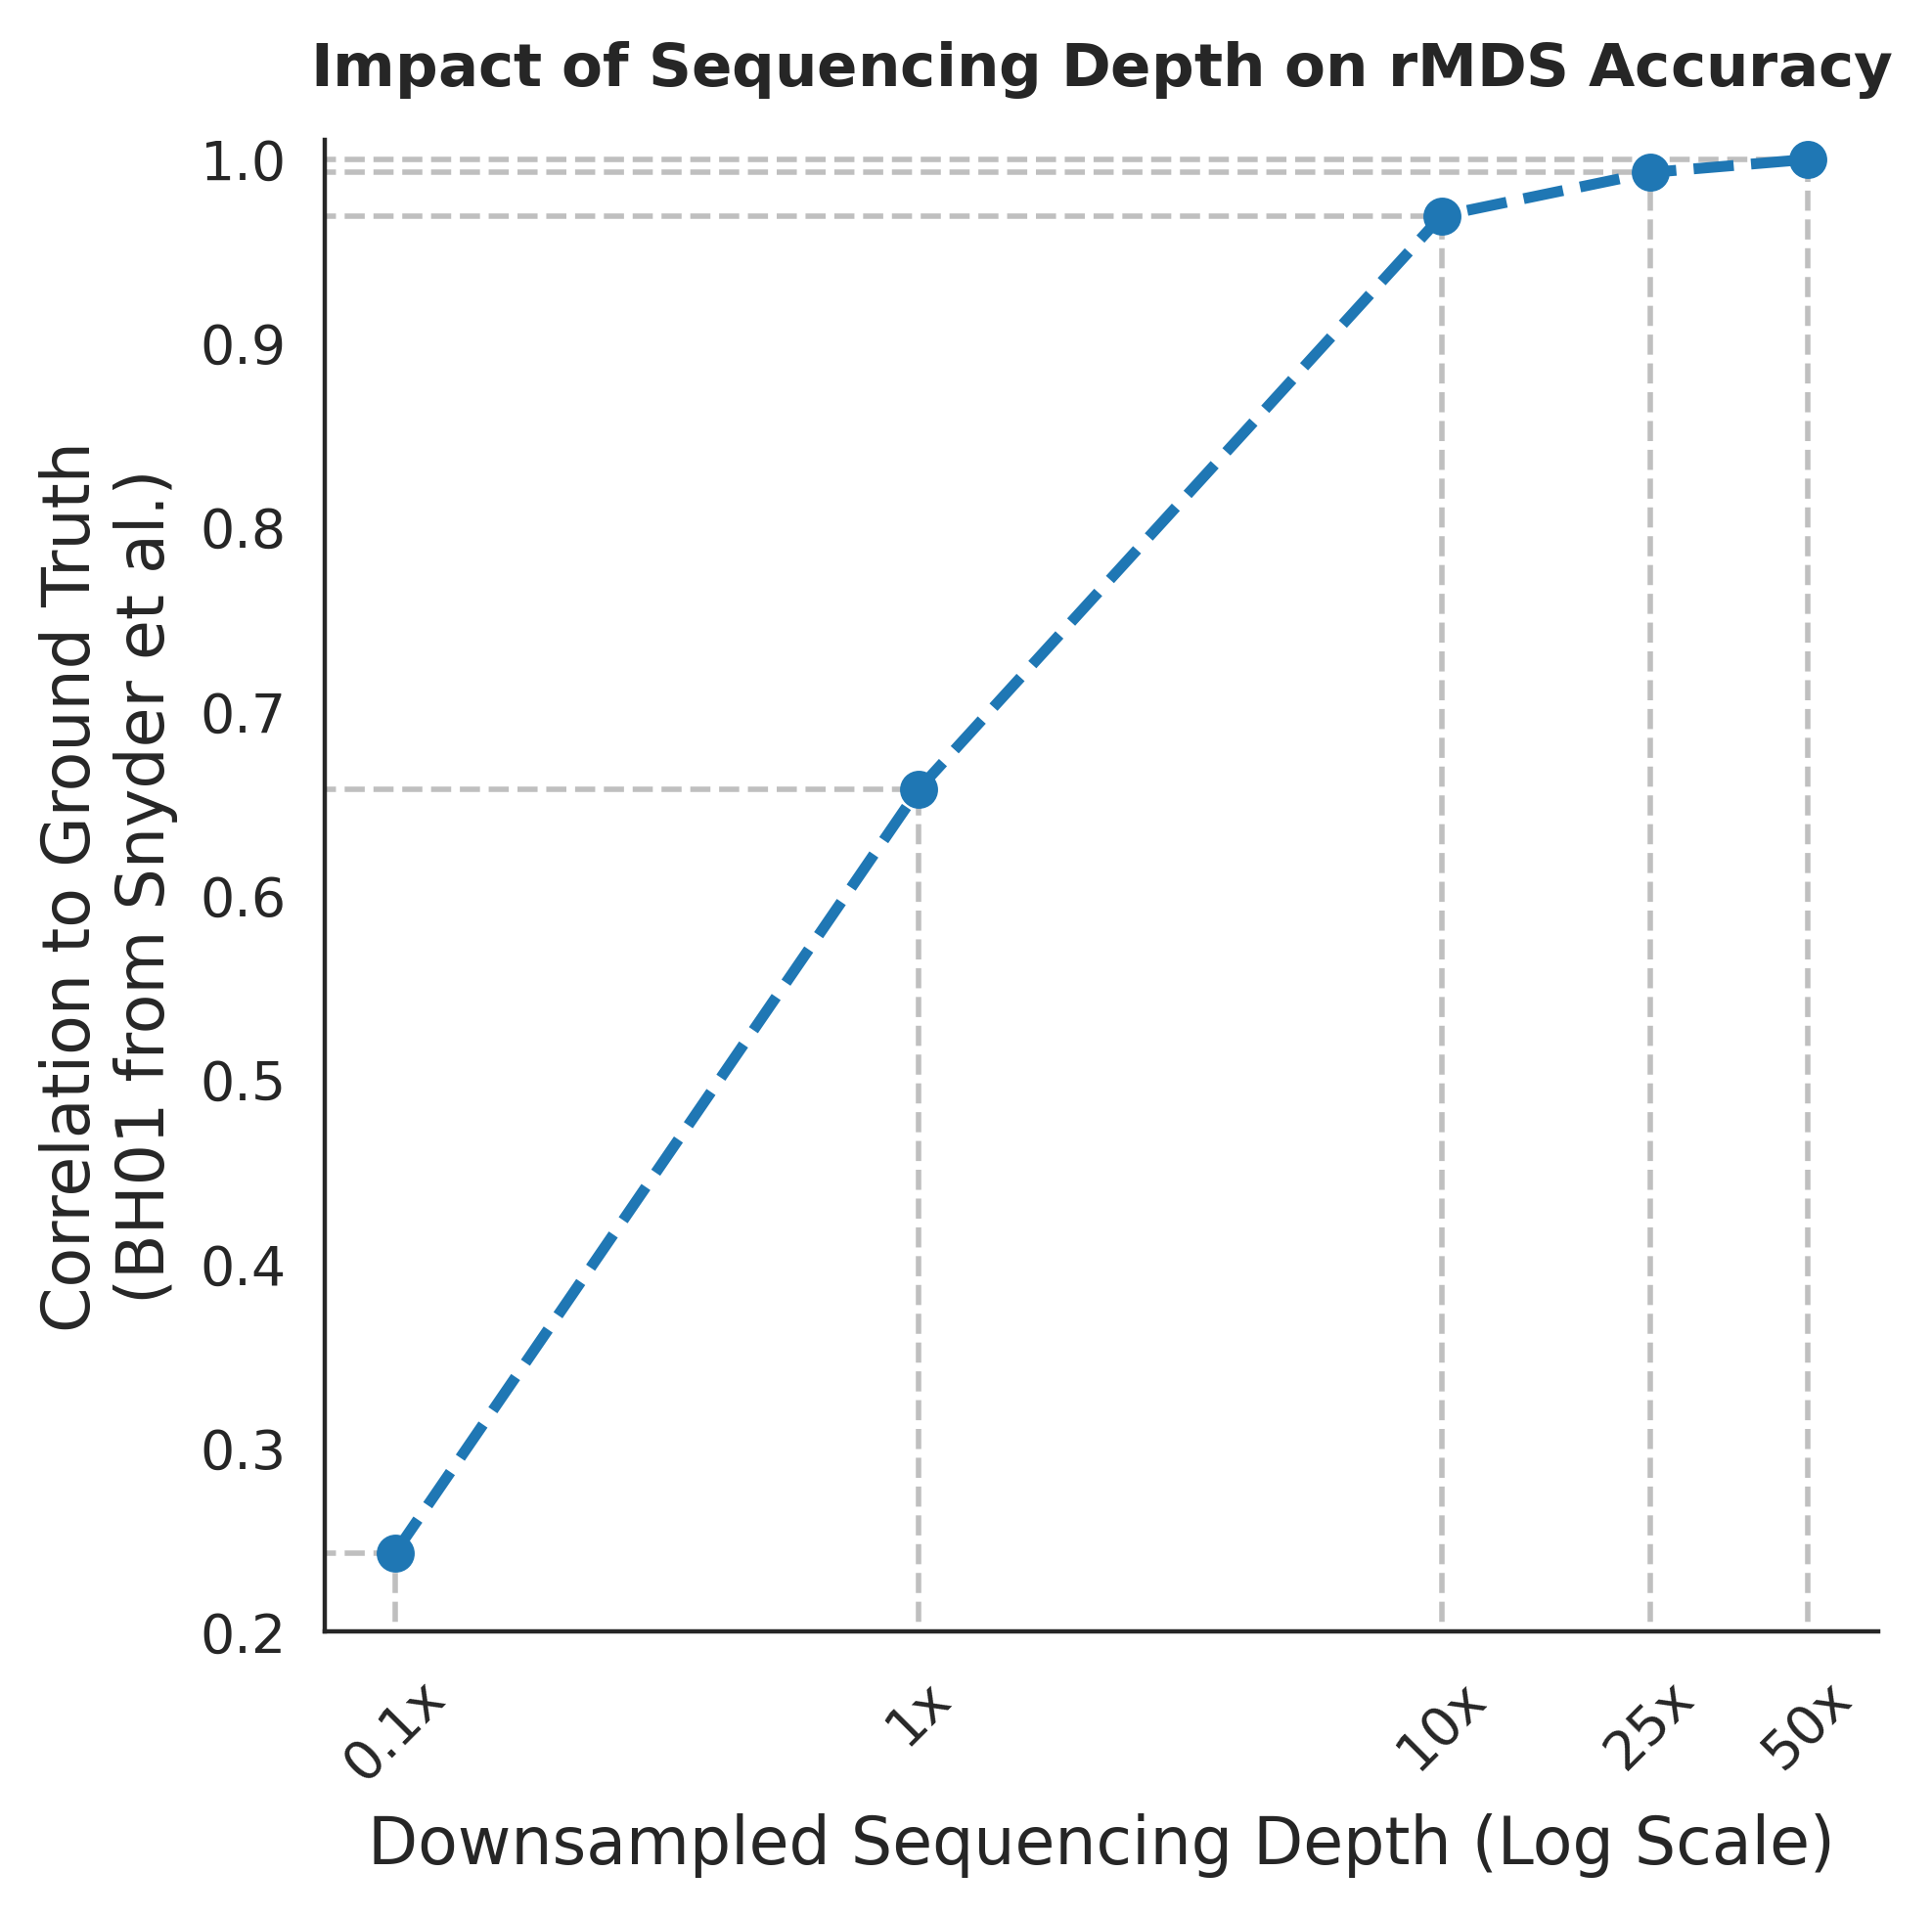

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ground_truth = final_df.loc['56x']
depths_str = ['0.1x', '1x', '10x', '25x', '50x']
plot_depths = [0.1, 1, 10, 25, 50]
correlations = [final_df.loc[d].corr(ground_truth) for d in depths_str]

sns.set_style("white")
fig, ax = plt.subplots(figsize=(5, 5), dpi=400)

ax.vlines(x=plot_depths, ymin=min(correlations)-0.1, ymax=correlations, colors='gray', linestyles='--', linewidth=1, alpha=0.5)
ax.hlines(y=correlations, xmin=0.00, xmax=plot_depths, colors='gray', linestyles='--', linewidth=1, alpha=0.5)

ax.plot(plot_depths, correlations, marker='o', linestyle='--', linewidth=2, zorder=3)

ax.set_xscale('log')
ax.set_xticks(plot_depths)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.set_xticklabels([f"{x:g}x" for x in plot_depths], rotation=45)
ax.set_ylim(0.2, 1.01)
ax.set_xlabel('Downsampled Sequencing Depth (Log Scale)', fontsize=12)
ax.set_ylabel('Correlation to Ground Truth\n(BH01 from Snyder et al.)', fontsize=12)

title_bold = r"$\mathbf{Impact\ of\ Sequencing\ Depth\ on\ rMDS\ Accuracy}$"
ax.set_title(title_bold, fontsize=11, pad=10)

sns.despine()
plt.tight_layout()
plt.savefig("BH01_Downsampling.pdf", dpi=600)
plt.show()

In [22]:
correlations

[0.2427749400655757,
 0.6571341039115701,
 0.9686069807004246,
 0.9920511542084068,
 0.9991873523189153]